In [1]:
from neuron import h,gui

import matplotlib.pyplot as plt
import numpy as np

In [2]:
N_sections = 11
h.celsius=22
nlist=[]
gcci = [h.Section() for i in range(N_sections)]
nlist.append(gcci)
gccd = [h.Section() for i in range(N_sections)]
nlist.append(gccd)
gci = [h.Section() for i in range(N_sections)]
nlist.append(gci)
gcd = [h.Section() for i in range(N_sections)]
nlist.append(gcd)

In [3]:
for i in range(N_sections-1):
    gcci[i+1].connect(gcci[i],1,0)
    gccd[i+1].connect(gccd[i],1,0)

for i in range(N_sections-1):
    gci[i+1].connect(gci[i],1,0)
for i in range(N_sections-1):
    gcd[i+1].connect(gcd[i],1,0)

In [4]:
for i in nlist:
    i[0].diam=10
    i[0].L=10
    i[0].nseg=3
     
for i in range(1,N_sections):
    for j in nlist:
        j[i].nseg=3
        j[i].L=20
        j[i].Ra=100
    gcd[i].diam=2-(i-1)*0.088 #(2-1.2)/9
    gci[i].diam=2.7-(i-1)*0.166 #(2.7-1.2)/9  
    
    gccd[i].diam=2-(i-1)*0.088 #(2-1.2)/9
    gcci[i].diam=2.7-(i-1)*0.166 #(2.7-1.2)/9

In [5]:
for i in range(N_sections):
    for j in nlist:
        j[i].insert('pas')
        j[i].g_pas=0.0002
        j[i].insert('kfast')
        j[i].insert('nat')
        j[i].insert('nadp')
        j[i].TotalPump_nadp=0
 
      
gcd[0].gbar_nat=4.1
gcd[0].gbar_kfast=4.1/80

gcd[1].gbar_nat=4.1
gcd[1].gbar_kfast=4.1/80

gci[0].gbar_nat=2.0
gci[0].gbar_kfast=2.0/80

gci[1].gbar_nat=2.0
gci[1].gbar_kfast=2.0/80

gcina=[2,2]
gcdna=[4.1,4.1]

for i in range(2,N_sections):    
    gci[i].gbar_nat=(gci[i-1].gbar_nat)+0.05*(gci[i-1].gbar_nat)
    gci[i].gbar_kfast=(gci[i-1].gbar_kfast)+0.05*(gci[i-1].gbar_kfast)
    gcina.append(round(gci[i].gbar_nat,5))
    
    
    gcd[i].gbar_nat=(gcd[i-1].gbar_nat)-0.12*(gcd[i-1].gbar_nat)
    gcd[i].gbar_kfast=(gcd[i-1].gbar_kfast)-0.12*(gcd[i-1].gbar_kfast)
    gcdna.append(round(gcd[i].gbar_nat,5))
    
avnared=2.2*((2.7+2.8+2.2+4.2)/4) #mM
avnablu=2.2*((6.5+6.3+7.2+11)/4) #mM

avnaredn=2.2*((2.7+2.8)/2) #mM
avnablun=2.2*((6.5+6.3+7.2)/3) #mM

In [6]:
pulscd=h.Ipulse1(0.5,sec=gccd[0])
pulscd.ton=5
pulscd.toff=15
pulscd.num=20
pulscd.amp=1#na

pulsci=h.Ipulse1(0.5,sec=gcci[0])
pulsci.ton=5
pulsci.toff=15
pulsci.num=20
pulsci.amp=1#na

pulsd=h.Ipulse1(0.5,sec=gcd[0])
pulsd.ton=5
pulsd.toff=15
pulsd.num=20
pulsd.amp=1 #na

pulsi=h.Ipulse1(0.5,sec=gci[0])
pulsi.ton=5
pulsi.toff=15
pulsi.num=20
pulsi.amp=1 #na

In [7]:
time_h = h.Vector()
time_h.record(h._ref_t)

inareci=[h.Vector() for i in range(N_sections)]
inarecd=[h.Vector() for i in range(N_sections)]

vrec_0=h.Vector()
vrec_1=h.Vector()
vrec_2=h.Vector()
vrec_3=h.Vector()
vrec_4=h.Vector()
vrec_5=h.Vector()

vrec_p1=h.Vector()
vrec_p2=h.Vector()
vrec_p3=h.Vector()

vrec_0.record(gcd[0](0.5)._ref_v)
vrec_1.record(gci[0](0.5)._ref_v)

vrec_p1.record(gccd[0](0.5)._ref_v)

vrec_2.record(gcd[1](0.5)._ref_v)
vrec_3.record(gci[1](0.5)._ref_v)

vrec_p2.record(gccd[1](0.5)._ref_v)

vrec_4.record(gcd[10](0.5)._ref_v)
vrec_5.record(gci[10](0.5)._ref_v)

vrec_p3.record(gccd[10](0.5)._ref_v)

for i in range(N_sections):
    inarecd[i].record(gcd[i](0.5)._ref_ina)
    inareci[i].record(gci[i](0.5)._ref_ina)

In [8]:
h.tstop =100
h.run()

0.0

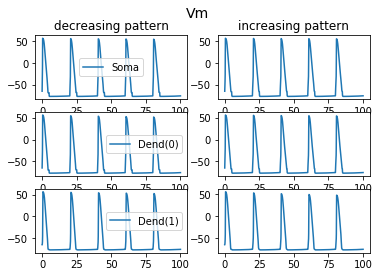

In [9]:
plt.suptitle('Vm',fontsize=14)

plt.subplot(321).set_title('decreasing pattern')
plt.plot(time_h,vrec_0)
plt.legend(['Soma'])


plt.subplot(322).set_title('increasing pattern')
plt.plot(time_h,vrec_1)

plt.subplot(323)
plt.plot(time_h,vrec_2)
plt.legend(['Dend(0)'])

plt.subplot(324)
plt.plot(time_h,vrec_3)

plt.subplot(325)
plt.plot(time_h,vrec_4)
plt.legend(['Dend(1)'])

plt.subplot(326)
plt.plot(time_h,vrec_5)

plt.show()

In [10]:
connai=[]
for i in range(N_sections):
   connai.append(round(gci[i](0.5).nai,3))

connad=[]
for i in range(N_sections):
    connad.append(round(gcd[i](0.5).nai,3)) 
    
connacd=[]
for i in range(N_sections):
    connacd.append(round(gccd[i](0.5).nai,3))
    
connaci=[]
for i in range(N_sections):
    connaci.append(round(gcci[i](0.5).nai,3))

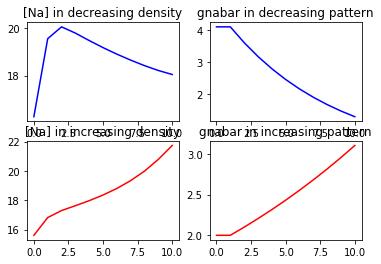

In [11]:
plt.subplot(2,2,1).set_title('[Na] in decreasing density')
plt.plot(connad,'b')

plt.subplot(2,2,2).set_title('gnabar in decreasing pattern')
plt.plot(gcdna,'b')

plt.subplot(2,2,3).set_title('[Na] in increasing density')
plt.plot(connai,'r')

plt.subplot(2,2,4).set_title('gnabar in increasing pattern')
plt.plot(gcina,'r')

plt.show()

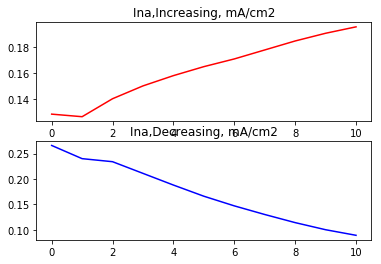

In [12]:
for i in range(N_sections):
    inareci[i]=np.asarray(inareci[i])
    inarecd[i]=np.asarray(inarecd[i])

Inabari=[]
Inabard=[]
for i in range(N_sections):
    Inabarii=-1*round(np.mean(inareci[i]),3)
    Inabari.append(Inabarii)
    Inabardd=-1*round(np.mean(inarecd[i]),3)
    Inabard.append(Inabardd)
    
plt.subplot(211).set_title('Ina,Increasing, mA/cm2')
plt.plot(Inabari,'r')

plt.subplot(212).set_title('Ina,Decreasing, mA/cm2')
plt.plot(Inabard,'b')

plt.show()